Most modern devices maintain a log of activity. This can mean storing information like devices communicated with, files downloaded/uploaded and type of communication protocol.

This useful information plays a vital role in identifying where a threat originated from and potential damage from it.

For example; if you are a victim of a computer virus, exploring your computer’s activity can help you pinpoint the action that led to a malicious program/file being downloaded. Next, you can track that program to see if it traveled to another computer in your network!

In this article, I am going to show you how you can use Python to analyze network traffic activity. Specifically, I am going to use a file from a WireShark lab (not a real network but mimics the activity of one). WireShark offers a range of tools that can help you analyze the logs, but learning how to digest the data with Python can help speed up the process.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

wireshark_url = "captured.csv"
wireshark_data = pd.read_csv(wireshark_url)
print(wireshark_data.head(10))

   No.      Time        Source   Destination Protocol  Length  \
0    1  0.000000  52.89.100.62   192.168.1.8  TLSv1.2      92   
1    2  0.000610  52.89.100.62   192.168.1.8      TCP      54   
2    3  0.008929  52.89.100.62   192.168.1.8  TLSv1.2     416   
3    4  0.008978   192.168.1.8  52.89.100.62      TCP      54   
4    5  0.009202  52.89.100.62   192.168.1.8  TLSv1.2      92   
5    6  0.009840   192.168.1.8  52.89.100.62      TCP      54   
6    7  0.014981   192.168.1.8  52.89.100.62      TCP      66   
7    8  0.058860   192.168.1.8  52.11.247.82      TCP      66   
8    9  0.303685  52.89.100.62   192.168.1.8      TCP      54   
9   10  0.303888   192.168.1.8  52.89.100.62      TCP      54   

                                                Info  
0                                   Application Data  
1   443  >  49762 [ACK] Seq=39 Ack=564 Win=114 Len=0  
2                                   Application Data  
3  49762  >  443 [ACK] Seq=1200 Ack=401 Win=258 L...  
4        

In [13]:
source = wireshark_data.groupby("Source").Source.count()
print(source.sort_values())

Source
AzureWaveTec_e2:10:8b          1
204.79.197.239                 1
20.198.118.190                 1
GenexisInter_91:45:e8          1
52.123.160.136                 2
23.57.74.18                    2
152.195.38.76                  2
52.182.143.210                 3
3.6.211.252                    3
fe80::5a26:19b2:227:e8d1       4
96.17.194.106                  4
172.217.166.22                 7
142.250.192.206               12
172.217.167.37                13
104.16.56.101                 13
13.107.213.68                 13
142.250.193.5                 15
142.250.206.165               15
52.11.247.82                  15
23.57.74.3                    16
142.250.195.3                 17
142.250.206.163               17
31.216.145.5                  18
172.217.166.6                 19
142.250.193.34                20
142.250.182.170               21
152.199.24.38                 22
142.250.206.174               22
142.250.193.33                23
142.250.194.3                 23
142

In [14]:
destinations = wireshark_data.groupby("Destination").Source.count()
print(destinations.sort_values())

Destination
ff02::1:2                   1
GenexisInter_91:45:e8       1
AzureWaveTec_e2:10:8b       1
204.79.197.239              1
23.211.217.111              1
152.195.38.76               2
20.198.118.190              2
23.57.74.18                 2
224.0.0.251                 3
ff02::fb                    3
239.255.255.250             4
52.123.160.136              4
96.17.194.106               4
52.182.143.210              5
172.217.166.22              7
142.250.192.206            10
52.11.247.82               11
13.107.213.68              11
172.217.167.37             12
142.250.193.5              14
142.250.195.3              16
142.250.206.165            17
23.57.74.3                 17
31.216.145.5               17
104.16.56.101              18
142.250.206.163            18
142.250.193.33             19
142.250.193.34             20
172.217.166.6              21
142.250.182.170            22
104.26.10.240              24
142.250.206.174            24
152.199.24.38              2

In [15]:
protocols = wireshark_data.groupby("Protocol").Source.count()
print(protocols.sort_values())

Protocol
DHCPv6        1
ARP           2
ICMP          2
SSDP          4
MDNS          6
TLSv1.2     168
DNS         180
TLSv1.3     694
TCP         999
QUIC       3994
Name: Source, dtype: int64


**Apply Graph Theory**

Using networkx in Python, you can build node graphs that represent a type of communication.

Since our data is in a pandas data frame, we can use networkx directly on it and select our nodes as “source” and “target”. The nodes we are interested in are “Source” and “Destination”. Choosing these nodes will help us see how devices on this network communicate.

In [16]:
network = nx.from_pandas_edgelist(wireshark_data, source='Source', target='Destination', edge_attr=True)
print(network.nodes())

['52.89.100.62', '192.168.1.8', '52.11.247.82', '23.57.74.3', '52.123.160.136', '239.255.255.250', '192.168.1.1', '142.250.206.163', '74.125.200.84', '142.250.77.196', '152.199.24.38', '3.6.211.252', '142.250.77.238', '142.250.195.22', '142.250.195.3', '74.125.68.84', '142.250.192.162', '142.250.194.3', '142.250.207.238', '142.250.194.65', '13.107.213.68', '142.250.193.67', '142.250.194.10', '172.217.166.6', '172.217.167.37', '142.250.206.165', 'GenexisInter_91:45:e8', 'AzureWaveTec_e2:10:8b', '142.250.193.5', '142.250.182.170', '142.250.193.33', '142.250.194.99', '142.250.77.206', '142.250.194.14', '152.195.38.76', '23.211.217.111', '31.216.145.5', '142.250.207.227', '224.0.0.251', 'fe80::5a26:19b2:227:e8d1', 'ff02::fb', '104.46.162.225', '142.250.194.174', 'ff02::1:2', '139.5.243.145', '139.5.243.140', '204.79.197.239', '142.250.206.174', '96.17.194.106', '20.198.118.190', '142.250.192.206', '172.217.161.14', '172.217.166.22', '104.26.10.240', '142.250.206.170', '142.250.193.34', '10

In [17]:
print(network.edges())

[('52.89.100.62', '192.168.1.8'), ('192.168.1.8', '52.11.247.82'), ('192.168.1.8', '23.57.74.3'), ('192.168.1.8', '52.123.160.136'), ('192.168.1.8', '239.255.255.250'), ('192.168.1.8', '192.168.1.1'), ('192.168.1.8', '142.250.206.163'), ('192.168.1.8', '74.125.200.84'), ('192.168.1.8', '142.250.77.196'), ('192.168.1.8', '152.199.24.38'), ('192.168.1.8', '3.6.211.252'), ('192.168.1.8', '142.250.77.238'), ('192.168.1.8', '142.250.195.22'), ('192.168.1.8', '142.250.195.3'), ('192.168.1.8', '74.125.68.84'), ('192.168.1.8', '142.250.192.162'), ('192.168.1.8', '142.250.194.3'), ('192.168.1.8', '142.250.207.238'), ('192.168.1.8', '142.250.194.65'), ('192.168.1.8', '13.107.213.68'), ('192.168.1.8', '142.250.193.67'), ('192.168.1.8', '142.250.194.10'), ('192.168.1.8', '172.217.166.6'), ('192.168.1.8', '172.217.167.37'), ('192.168.1.8', '142.250.206.165'), ('192.168.1.8', '142.250.193.5'), ('192.168.1.8', '142.250.182.170'), ('192.168.1.8', '142.250.193.33'), ('192.168.1.8', '142.250.194.99'), (

With our chosen nodes, we’ll use networkx again with the function draw_circular to display a network map based on the traffic!

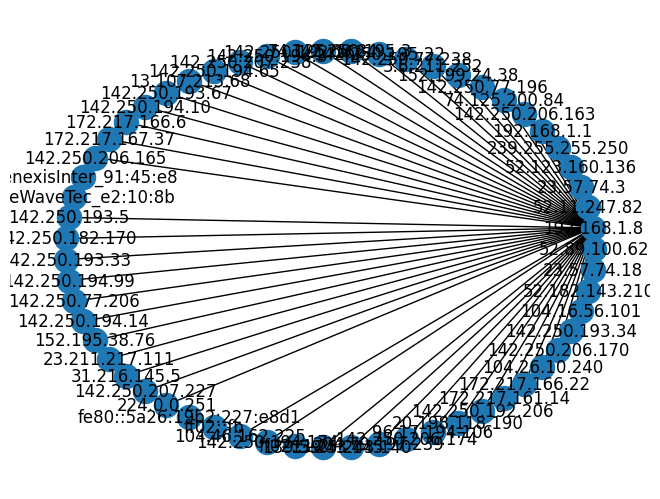

In [18]:
nx.draw_circular(network, with_labels=True)

We can see who communicates with who!

Now, let’s say you red flag a device. You don’t recognize its owner so its activity should not appear in your private network traffic.

We’ll call that device suspect and use networkx to create a color-coded map showing us which devices the malicious device communicated with.

Observing our results we see which devices it communicated with and other devices it could have potentially reached.

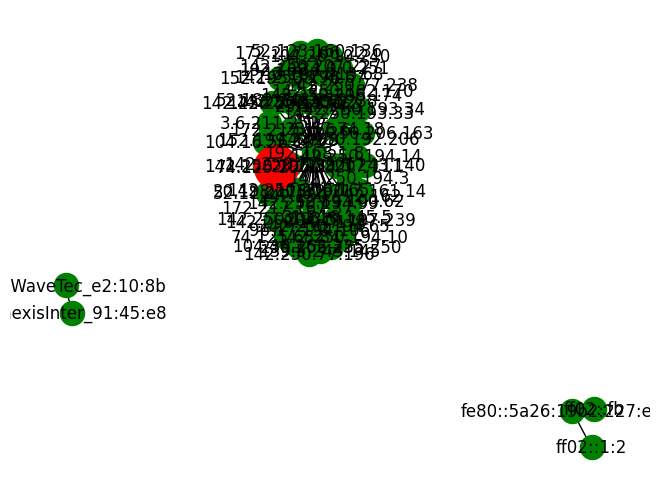

In [9]:
suspect = "74.125.200.84"
pos = nx.spring_layout(network)
nx.draw(network, pos, node_color = "green", node_size = 300, with_labels = True)

options = {"node_size": 1000, "node_color":"r"}
nx.draw_networkx_nodes(network, pos, nodelist=[suspect], **options)

plt.show()

Taking a deeper look at the malicious device, we can make a new data frame that includes other devices it communicated with, type of communication, the time it happened, and information about it.

In [10]:
wireshark_data.loc[wireshark_data['Source'] == '74.125.200.84']

,No.,Time,Source,Destination,Protocol,Length,Info
177,178,7.009906,74.125.200.84,192.168.1.8,TCP,66,"443 > 49769 [SYN, ACK] Seq=0 Ack=1 Win=65535..."
215,216,7.164713,74.125.200.84,192.168.1.8,TCP,54,443 > 49769 [ACK] Seq=1 Ack=572 Win=66816 Len=0
216,217,7.164713,74.125.200.84,192.168.1.8,TLSv1.3,1466,"Server Hello, Change Cipher Spec"
218,219,7.165271,74.125.200.84,192.168.1.8,TCP,1466,"443 > 49769 [PSH, ACK] Seq=1413 Ack=572 Win=..."
224,225,7.169981,74.125.200.84,192.168.1.8,TCP,1466,443 > 49769 [ACK] Seq=2825 Ack=572 Win=66816...
...,...,...,...,...,...,...,...
3452,3453,23.949513,74.125.200.84,192.168.1.8,QUIC,76,Protected Payload (KP0)
3454,3455,24.001931,74.125.200.84,192.168.1.8,QUIC,162,Protected Payload (KP0)
3455,3456,24.028910,74.125.200.84,192.168.1.8,QUIC,67,Protected Payload (KP0)
3457,3458,24.029573,74.125.200.84,192.168.1.8,QUIC,67,Protected Payload (KP0)
